In [ ]:
import numpy as np
import matplotlib.pyplot as plt


Make random data!

In [155]:
noise_scale = 2
N = 10
x_range = 10

x = np.random.rand(N) * x_range
noise = np.random.normal(0,noise_scale,N)

alpha = np.random.rand() * x_range
beta = np.random.rand() * 2 - 1

y = alpha + beta * (x + noise)

Linear regression, estimate best fit line to minimise variance in Y

Beta 0.5109557463390046, alpha 2.366666698615066
Correlation coefficient 0.7989846458579718


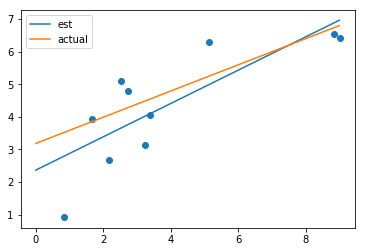

In [158]:
beta_est = np.cov(x,y,bias=True)[1,0]/np.var(x)
alpha_est = np.mean(y) - beta_est * np.mean(x)
print('Beta {0}, alpha {1}'.format(beta_est,alpha_est))

plt.scatter(x,y)
plt.plot(*np.array([[x,beta_est * x + alpha_est] for x in np.arange(0,x_range,x_range/10)]).T,label = 'est')
plt.plot(*np.array([[x,beta * x + alpha] for x in np.arange(0,x_range,x_range/10)]).T, label = 'actual');
plt.legend()
r = beta_est * np.std(x)/np.std(y)
print('Correlation coefficient {0}'.format(r))


Lets look at the covariance, and the singular value decomposition

In [163]:
data = np.array((x-x.mean(),y-y.mean())).T
cv = lambda x : np.dot(x.T,x)/x.shape[0]
cov = cv(data)
print(cov)

[[7.32093337 3.74067297]
 [3.74067297 2.9940301 ]]


Here are the eigenvectors of the covariance matrix

In [169]:
w,v = np.linalg.eig(cov)
print(w)
print(v)

[9.47872661 0.83623686]
[[ 0.86621438 -0.49967253]
 [ 0.49967253  0.86621438]]


If we do the SVD of the data, we get the same vectors, as well as the singular values:

In [175]:
u,s,vh = np.linalg.svd(data,full_matrices=False)
print(vh)
print(s**2/data.shape[0])
print(np.all(np.isclose(((u * s) @ vh),data)))

[[ 0.86621438  0.49967253]
 [ 0.49967253 -0.86621438]]
[9.47872661 0.83623686]
True


Lets plot the line that the first vector projects on to. Notice that it is different to the least squares regression line, since this tries to minimise the variance of y, not maximise the covariance of the data along the projection

In [179]:
w0_line = lambda p : (vh[0][0]/vh[0][1]) * (p - x.mean()) + y.mean()

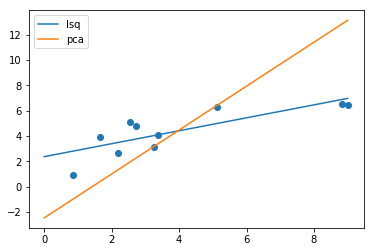

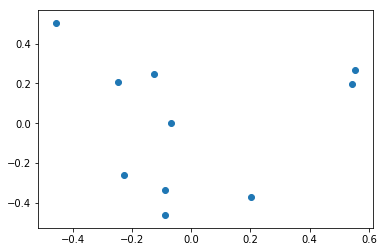

In [180]:
plt.scatter(x,y)
plt.plot(*np.array([[x,beta_est * x + alpha_est] for x in np.arange(0,x_range,x_range/10)]).T,label='lsq')
plt.plot(*np.array([[x,w0_line(x)] for x in np.arange(0,x_range,x_range/10)]).T,label ='pca')
plt.legend()
plt.show()
plt.close()
plt.scatter(*(u.T));